# Altair vs Seaborn

In [2]:
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data # pip install vega_datasets
import altair as alt  # pip install altair

In [3]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = 16, 5

## Load Data

## Plotting Many Rows

In [6]:
dataset = sm.datasets.get_rdataset("KeyWestWater", package="Stat2Data").data
dataset.head()

,DateTime,WaterTemp,t
0,10/3/2016 0:00,86.2,1
1,10/3/2016 1:00,86.2,2
2,10/3/2016 2:00,86.2,3
3,10/3/2016 3:00,86.2,4
4,10/3/2016 4:00,86.0,5


### Seaborn

Possible, but slow

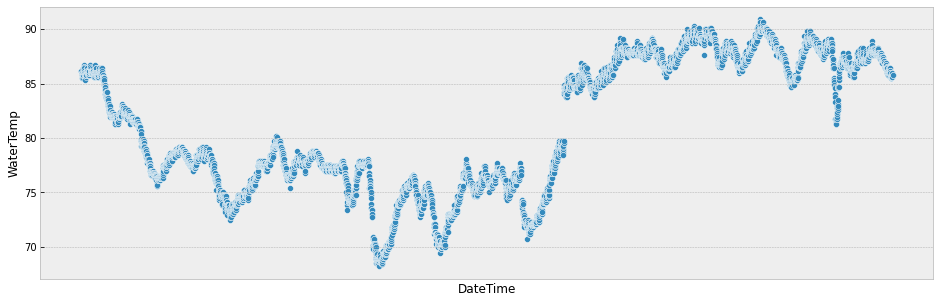

In [7]:
sns.scatterplot(x="DateTime", y="WaterTemp", data=dataset)
plt.xticks([])
plt.show()

### Altair

**Possible but do it with caution, see [documentation](https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets)**

In [8]:
alt.Chart(dataset).mark_point().encode(
    x="DateTime:T",
    y=alt.Y("WaterTemp", scale=alt.Scale(zero=False)),
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

## Conditioning

In [9]:
dataset = sm.datasets.get_rdataset("KeyWestWater", package="Stat2Data").data
dataset.head()

,DateTime,WaterTemp,t
0,10/3/2016 0:00,86.2,1
1,10/3/2016 1:00,86.2,2
2,10/3/2016 2:00,86.2,3
3,10/3/2016 3:00,86.2,4
4,10/3/2016 4:00,86.0,5


### Seaborn

**Not possible at the moment**

### Altair

In [7]:
alt.Chart(dataset.iloc[4000:9000]).mark_point().encode(
    x="DateTime:T",
    y=alt.Y("WaterTemp", scale=alt.Scale(zero=False)),
    color=alt.condition(
        alt.datum.WaterTemp > 86,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
)

alt.Chart(...)

## Rolling Function

In [10]:
dataset = sm.datasets.get_rdataset("goog", package="fpp2").data
dataset.head()

,time,value
0,1,392.830017
1,2,392.512085
2,3,397.305908
3,4,398.011322
4,5,400.490204


### Seaborn

**Not possible at the moment**

### Altair

In [9]:
line = alt.Chart(dataset).mark_line().transform_window(
    rolling_mean='mean(value)',
    frame=[-20, 20]
).encode(
    x='time',
    y='rolling_mean:Q',
    color=alt.value("firebrick"),
    size=alt.value(2)
)

points = alt.Chart(dataset).mark_point().encode(
    alt.X('time'),
    alt.Y('value', scale=alt.Scale(zero=False)),
    size=alt.value(10)
)

points + line

alt.LayerChart(...)

## Re-Use Plot as Template

In [10]:
dataset = data.iris()
dataset.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Seaborn

**Not possible at the moment**

### Altair

In [11]:
chart = alt.Chart(dataset).mark_point().encode(
    color="species"
).properties(
    width=250,
    height=250
)

chart.encode(x="sepalLength", y="sepalWidth") | chart.encode(x="petalLength", y="petalWidth")

alt.HConcatChart(...)

## Confidence Intervals for the mean

In [14]:
dataset = data.iris()
dataset.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Seaborn

<AxesSubplot:xlabel='species', ylabel='sepalWidth'>

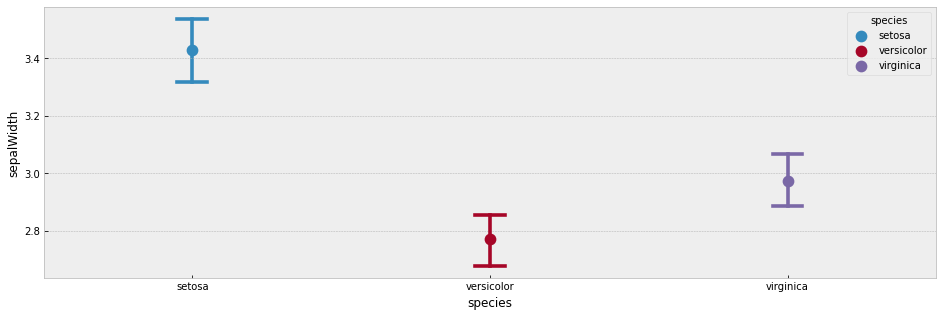

In [16]:
sns.pointplot(x="species", y="sepalWidth", hue="species", data=dataset, capsize=0.1)

### Altair

In [17]:
mean_point = alt.Chart(dataset).mark_circle().encode(
    x=alt.X('species'),
    y=alt.Y('mean(sepalWidth)'),
    color="species",
    size=alt.value(50)
)

errorbar = alt.Chart(dataset).mark_errorbar(extent='ci', ticks=True).encode(
    x='species',
    y=alt.Y('sepalWidth', scale=alt.Scale(zero=False)),
    color="species",
    strokeWidth=alt.value(2)
    
).properties(
    width=800,
    height=250,
)

errorbar + mean_point

alt.LayerChart(...)

## Confidence Intervals for the other estimator (e.g. Median)

In [18]:
import numpy as np

### Seaborn

<AxesSubplot:xlabel='species', ylabel='sepalWidth'>

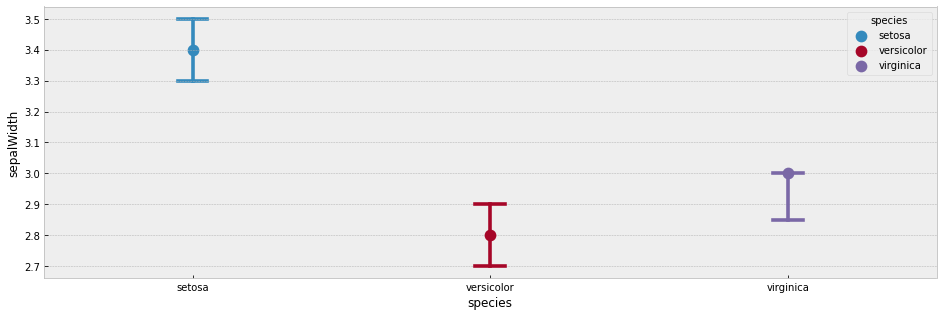

In [19]:
sns.pointplot(x="species", y="sepalWidth", hue="species", data=dataset, estimator=np.median, capsize=0.1)

### Altair

**Not possible at the moment**